## Import and load libs

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from numpy import mean
from numpy import std
from tqdm import tqdm_notebook
import time
import datetime
import os
pd.options.display.precision = 15
from pathlib import Path
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
data_folder=Path("C:/Users/msi/Desktop/classification/project/project/")
file_to_open= data_folder/ "fout.csv"

## install imbalanced-learn

In [ ]:
#pip install imbalanced-learn

## name the columns and detect nulls

In [2]:
%%time
df = pd.read_csv(file_to_open,names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'post', 'relationship', 'nation', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'wealth'],na_values=[' ?','?','? ',' ? '])

Wall time: 360 ms


### let's play with and preview the data

In [3]:
import math
print(df.shape)
print(df.info())
print('--------------------------')
# let's drop duplicate rows
df=df.drop_duplicates(keep='first')
print(df.shape)
df.head()
# as you can see in the results there are no duplicate rows
# df.workclass.value_counts()
# df.iloc[0]
# df.dropna()
# df.iloc[20][1]==' ?'
# df_obj = df.select_dtypes(['object'])
# df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
# temp=df.iloc[20][1]
# math.isnan(temp)

(24515, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24515 entries, 0 to 24514
Data columns (total 15 columns):
age               24515 non-null int64
workclass         23140 non-null object
fnlwgt            24515 non-null int64
education         24515 non-null object
education_num     24515 non-null int64
marital_status    24515 non-null object
post              23134 non-null object
relationship      24515 non-null object
nation            24515 non-null object
gender            24515 non-null object
capital_gain      24515 non-null int64
capital_loss      24515 non-null int64
hours_per_week    24515 non-null int64
country           24060 non-null object
wealth            24515 non-null object
dtypes: int64(6), object(9)
memory usage: 2.8+ MB
None
--------------------------
(24503, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,post,relationship,nation,gender,capital_gain,capital_loss,hours_per_week,country,wealth
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,M,0,0,13,United-States,lowerCase
1,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,F,0,0,40,Cuba,lowerCase
2,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,F,0,0,40,United-States,lowerCase
3,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,M,0,0,45,United-States,upperCase
4,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,F,14084,0,50,United-States,upperCase


### Now it's time to check for null counts in each column

In [4]:
print(df.isnull().sum())
print(df[['workclass','post']].isnull().all(axis='columns').sum())

age                  0
workclass         1375
fnlwgt               0
education            0
education_num        0
marital_status       0
post              1381
relationship         0
nation               0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
country            454
wealth               0
dtype: int64
1375


In [5]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [6]:
%%time
missing_data(df)

Wall time: 401 ms


,age,workclass,fnlwgt,education,education_num,marital_status,post,relationship,nation,gender,capital_gain,capital_loss,hours_per_week,country,wealth
Total,0,1375,0,0,0,0,1381,0,0,0,0,0,0,454,0
Percent,0,5.61155776843652,0,0,0,0,5.63604456597151,0,0,0,0,0,0,1.85283434681468,0
Types,int64,object,int64,object,int64,object,object,object,object,object,int64,int64,int64,object,object


### let's first drop rows with null posts

In [7]:
df1=df.dropna(subset=['post','country'])
# because we want to see the correlation between numerical values and wealth is so important to us, therefore 
# I convert wealth to a numerical value
df1['wealth'] = df1['wealth'].map({' lowerCase':0, ' upperCase':1})
print(df1.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
post              0
relationship      0
nation            0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
wealth            0
dtype: int64


# Data analysis

## Is there any outlier?

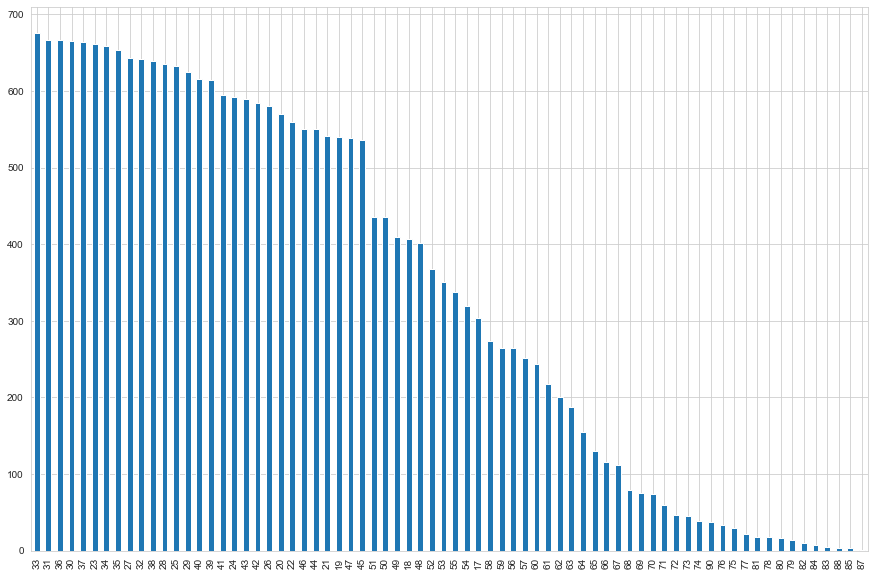

In [9]:
sns.set_style("whitegrid")
df.age.value_counts().plot(kind='bar',figsize=(15, 10))

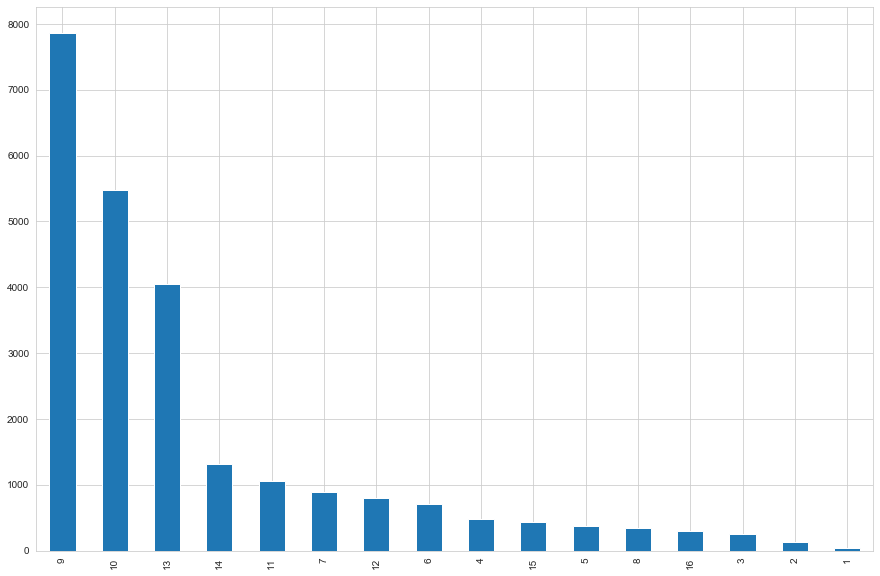

In [10]:
df.education_num.value_counts().plot(kind='bar' , figsize=(15,10))

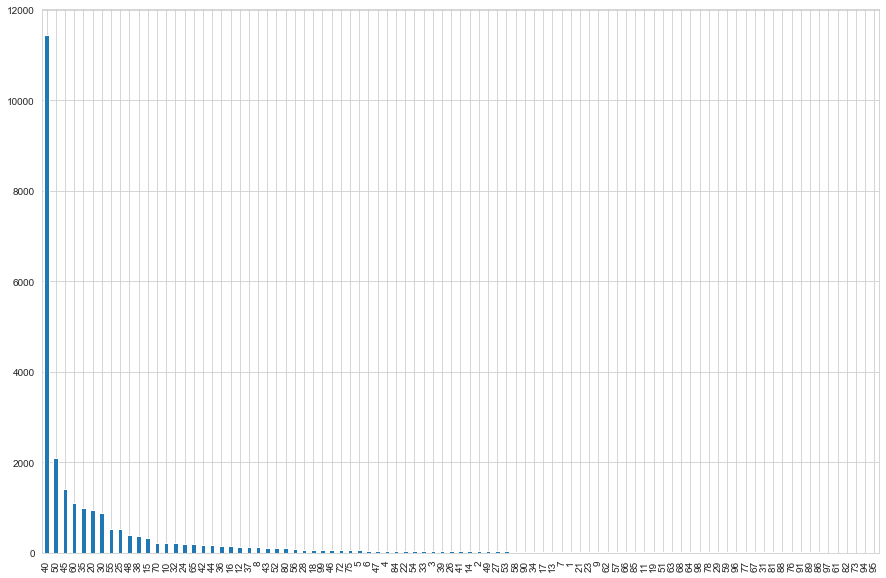

In [11]:
df.hours_per_week.value_counts().plot(kind='bar' , figsize=(15,10))

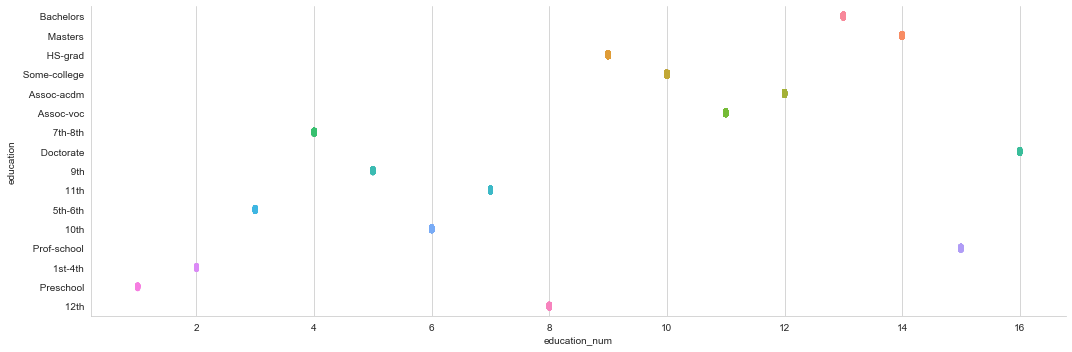

In [12]:
sns.catplot(x="education_num", y="education", data=df,height=5, aspect=3)

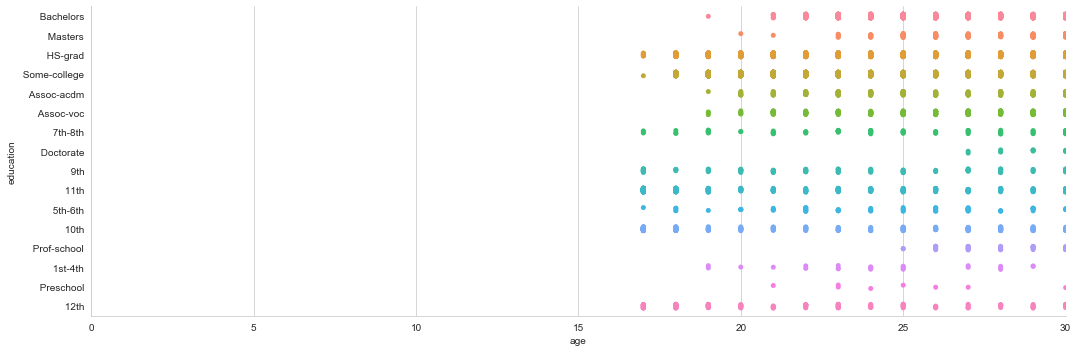

In [13]:
sns.catplot(x="age", y="education", data=df,height=5, aspect=3).set(xlim=(0,30))

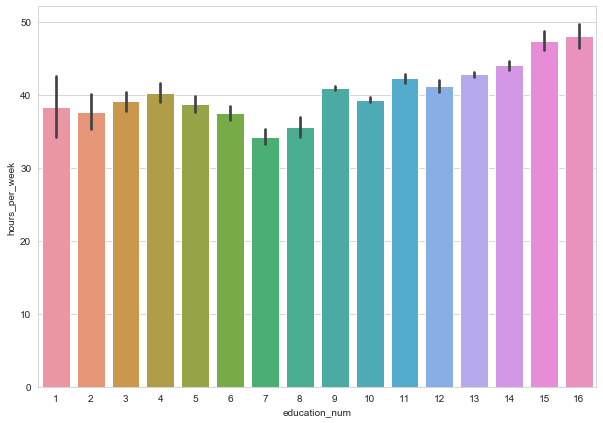

In [14]:
plt.rcParams['figure.figsize'] = [10,7]
sns.barplot(x = df1['education_num'], y = df1['hours_per_week'], data = df1)

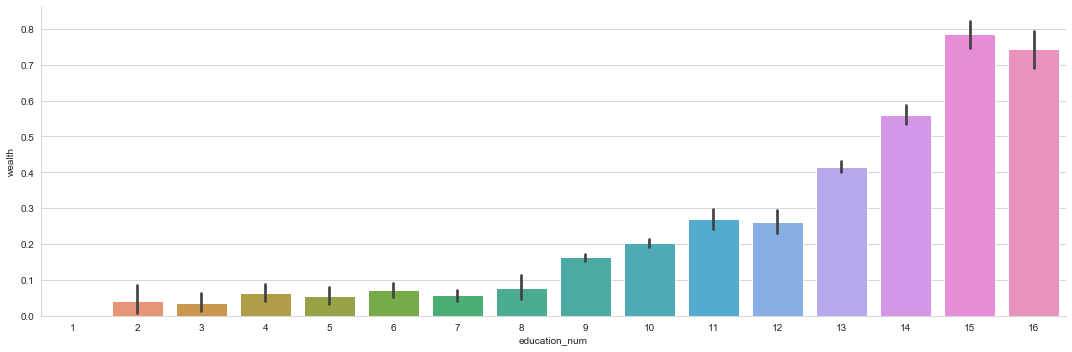

In [15]:
sns.factorplot(x="education_num",y="wealth",data=df1,kind="bar",height=5, aspect=3)

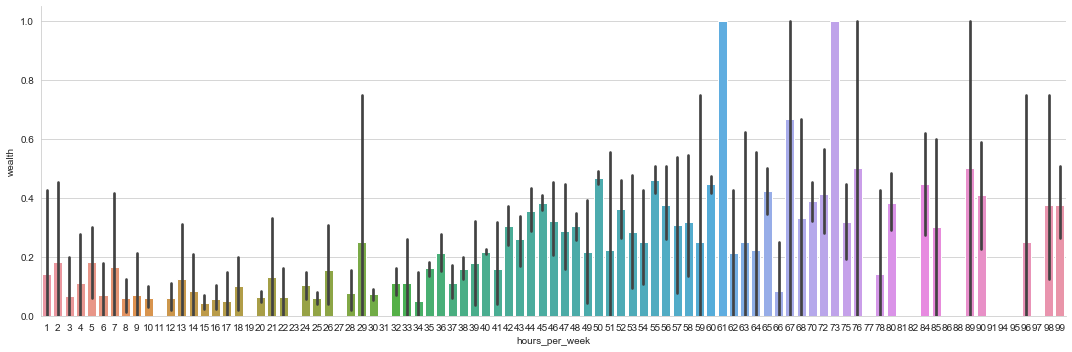

In [16]:
sns.factorplot(x="hours_per_week",y="wealth",data=df1,kind="bar",height=5, aspect=3)

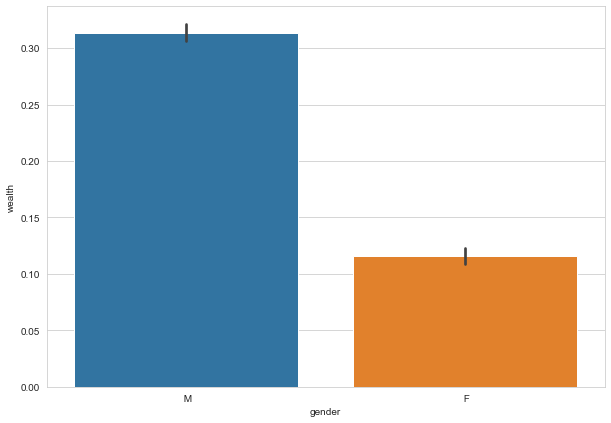

In [17]:
sns.barplot(x="gender",y="wealth",data=df1)

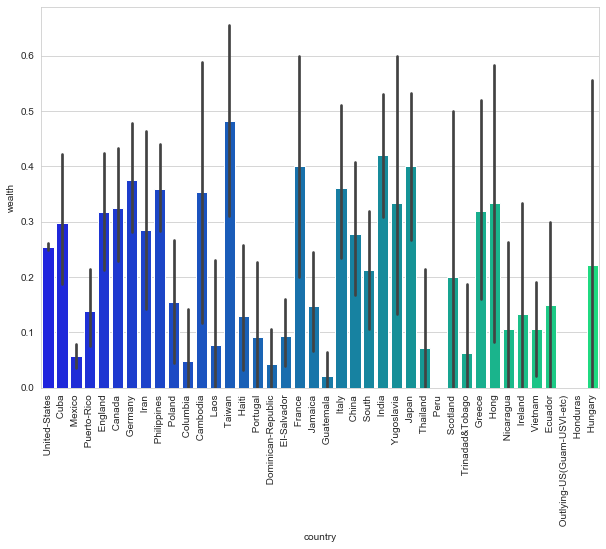

In [18]:
sns_ = sns.barplot(x = 'country', y = 'wealth', data = df1, palette = 'winter')
plt.setp(sns_.get_xticklabels(), rotation = 90);


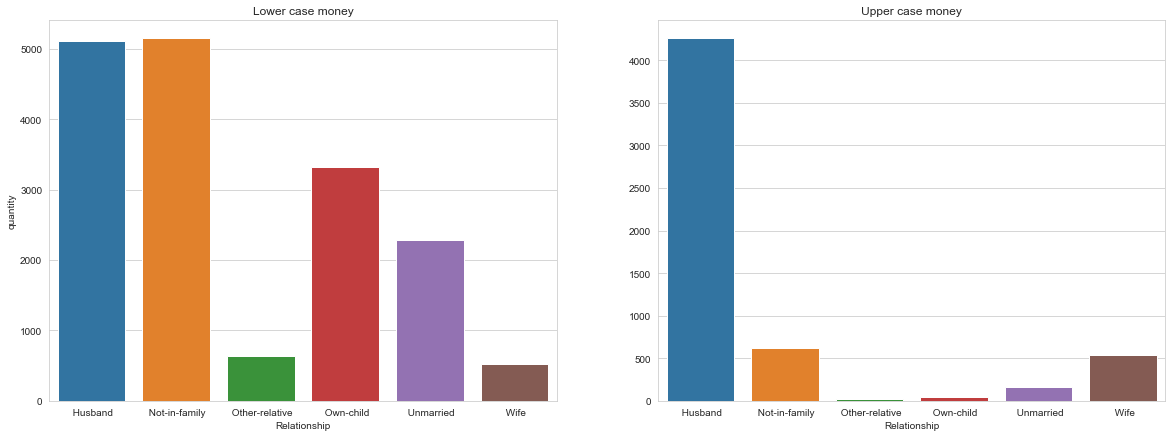

In [23]:
fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [10,7]
ax[0].set_ylabel("quantity")
ax[0].set_xlabel("Relationship")
ax[1].set_xlabel("Relationship")
ax[0].title.set_text("Lower case money")
ax[1].title.set_text("Upper case money")
lower = df1.loc[df1['wealth'] == 0,['relationship']].groupby('relationship').size()
upper = df1.loc[df1['wealth'] == 1,['relationship']].groupby('relationship').size()
sns_rel_1 = sns.barplot(x = list(lower.index), y = list(lower), ax = ax[0])
sns_rel_2= sns.barplot(x = list(upper.index), y = list(upper), ax = ax[1])

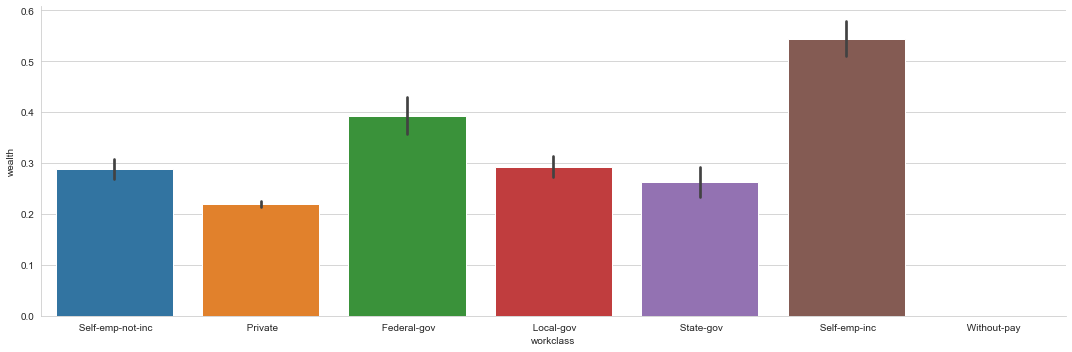

In [24]:
sns.factorplot(x="workclass",y="wealth",data=df1,kind="bar",height=5, aspect=3)

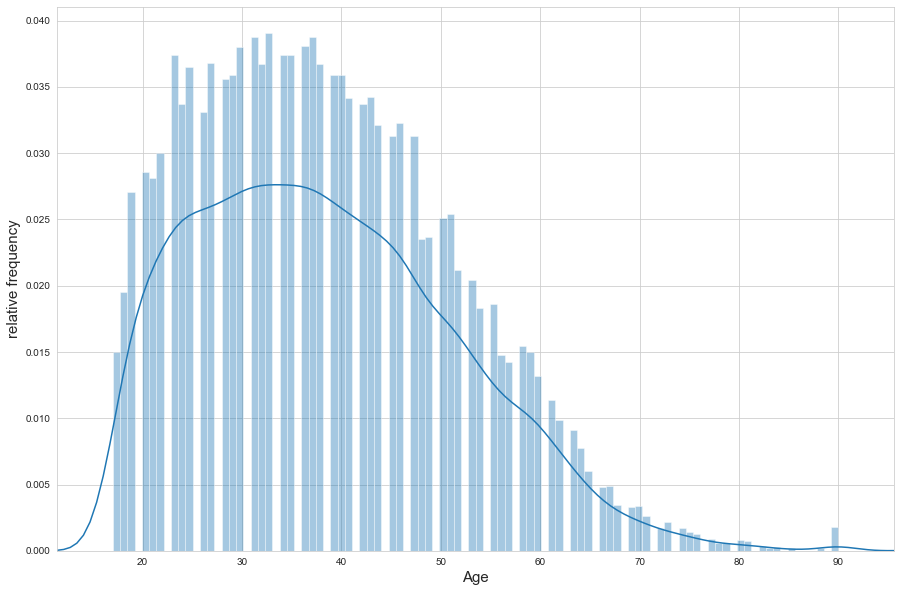

In [25]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.distplot(df1['age'], bins = 100)
plt.ylabel("relative frequency", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

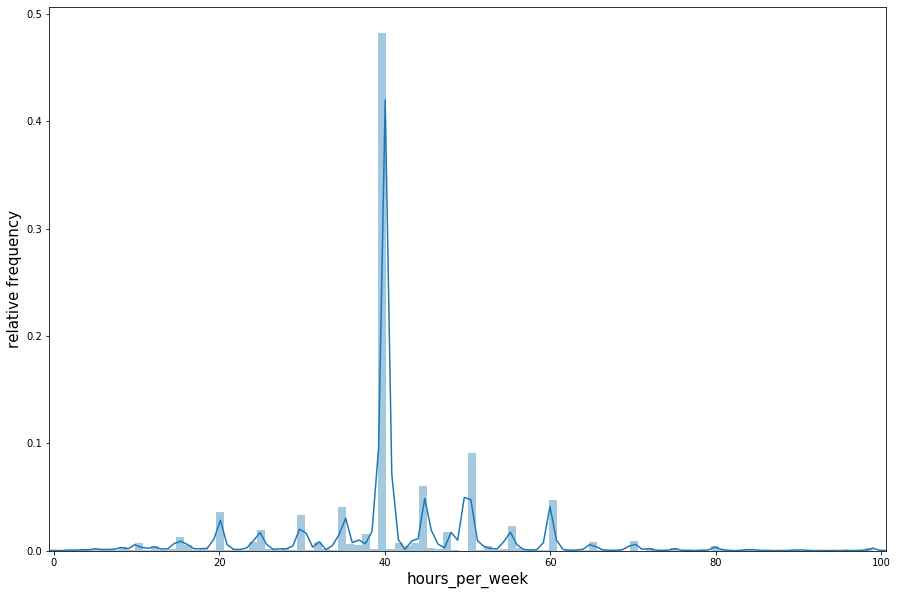

In [13]:
sns.distplot(df1['hours_per_week'], bins = 100)
plt.ylabel("relative frequency", fontsize = 15)
plt.xlabel("hours_per_week", fontsize = 15)
plt.margins(x = 0)

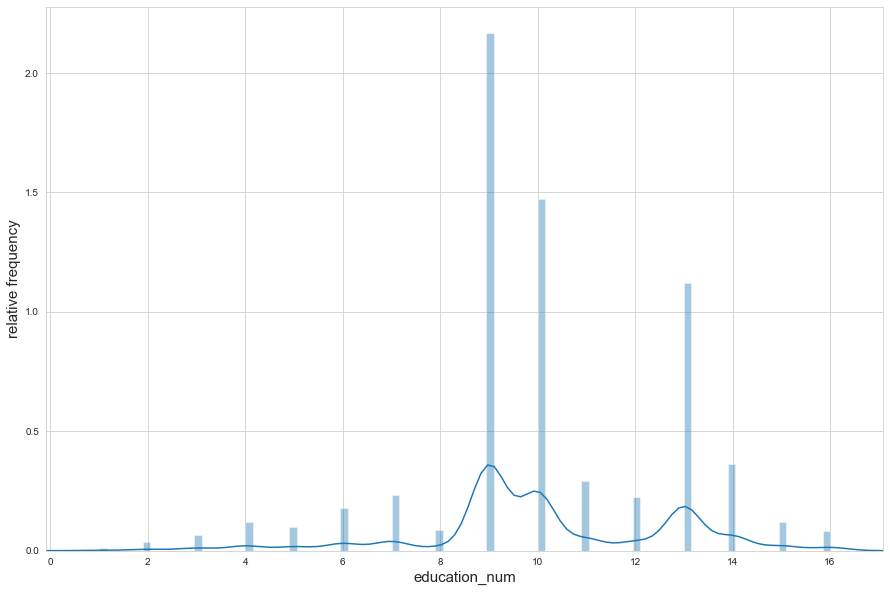

In [26]:
sns.distplot(df1['education_num'], bins = 100)
plt.ylabel("relative frequency", fontsize = 15)
plt.xlabel("education_num", fontsize = 15)
plt.margins(x = 0)

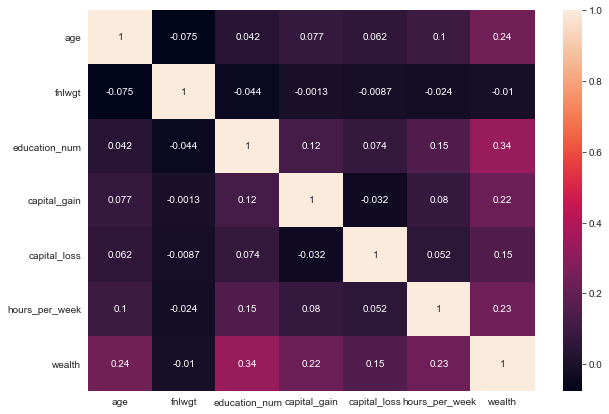

In [27]:
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df1.corr(), annot = True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!



In [28]:
df_backup=df
# df1=df.dropna(subset=['post','country'])
for column in ['workclass', 'post', 'country']:
    df[column].fillna(df[column].mode()[0], inplace=True)
df1=df
# because we want to see the correlation between numerical values and wealth is so important to us, therefore 
# I convert wealth to a numerical value
df1['wealth'] = df1['wealth'].map({' lowerCase':0, ' upperCase':1})
print(df1.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
post              0
relationship      0
nation            0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
wealth            0
dtype: int64


In [29]:
# Changing the Categorical Values to Numerical values using the Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df1.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df1[feature] = label_encoder_feat[feature].fit_transform(df1[feature])

df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,post,relationship,nation,gender,capital_gain,capital_loss,hours_per_week,country,wealth
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,37,0
1,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
2,37,3,284582,12,14,2,3,5,4,0,0,0,40,37,0
3,52,5,209642,11,9,2,3,0,4,1,0,0,45,37,1
4,31,3,45781,12,14,4,9,1,4,0,14084,0,50,37,1


In [30]:
# Shuffling the Data Set
from sklearn.utils import shuffle
df1 = shuffle(df1)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split
ss=StandardScaler()
features_ = df1.drop(columns = ['wealth', 'education_num'])
features_ = pd.DataFrame(ss.fit_transform(features_),columns = features_.columns)
target = df1['wealth']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (17152, 13)
Test data set size :  (7351, 13)


# Classification

In [31]:
seed = 7
num_folds = 10
# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.806727 (0.008784)
LDA: 0.789644 (0.009888)
KNN: 0.816697 (0.013759)
CART: 0.804921 (0.009658)
NB: 0.801071 (0.010124)
RF: 0.853895 (0.009978)


In [32]:
# Training the model_1
logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_test)

print ("The accuracy of model 1 : ",accuracy_score(y_test, pred_1))
print(confusion_matrix(y_test, pred_1))
print(classification_report(y_test, pred_1))

The accuracy of model 1 :  0.7971704529995919
[[5319  224]
 [1267  541]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5543
           1       0.71      0.30      0.42      1808

    accuracy                           0.80      7351
   macro avg       0.76      0.63      0.65      7351
weighted avg       0.78      0.80      0.76      7351



In [33]:
# Training the model_2
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print(confusion_matrix(y_test, pred_2))
print(classification_report(y_test, pred_2))

The accuracy of model 2 :  0.8559379676234526
[[5193  350]
 [ 709 1099]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5543
           1       0.76      0.61      0.67      1808

    accuracy                           0.86      7351
   macro avg       0.82      0.77      0.79      7351
weighted avg       0.85      0.86      0.85      7351



## Using SMOTE for resampling dataset

In [34]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
model = RandomForestClassifier()
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    over = SMOTE(sampling_strategy=0.5,k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.8)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean f1: %.3f' % (k, score))
pipeline.fit(X_train, y_train)
pred_10 = pipeline.predict(X_test)
print ("The accuracy of model 10_pipeline : ",accuracy_score(y_test, pred_10))
print(confusion_matrix(y_test, pred_10))
print(classification_report(y_test, pred_10))

> k=1, Mean f1: 0.688
> k=2, Mean f1: 0.685
> k=3, Mean f1: 0.685
> k=4, Mean f1: 0.684
> k=5, Mean f1: 0.684
> k=6, Mean f1: 0.684
> k=7, Mean f1: 0.683
The accuracy of model 10_pipeline :  0.8363487960821657
[[4792  751]
 [ 452 1356]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      5543
           1       0.64      0.75      0.69      1808

    accuracy                           0.84      7351
   macro avg       0.78      0.81      0.79      7351
weighted avg       0.85      0.84      0.84      7351



## Using Borderline-SMOTE
### look at confusion matrix for exact results

In [35]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
nX, ny = oversample.fit_resample(X_train, y_train)
R_forest = RandomForestClassifier(n_estimators = 200)
model_22 = R_forest.fit(nX, ny)

# Predictions
pred_22 = model_22.predict(X_test)
print ("The accuracy of model 22 : ",accuracy_score(y_test, pred_22))
print(confusion_matrix(y_test, pred_22))
print(classification_report(y_test, pred_22))

The accuracy of model 22 :  0.8387974425248266
[[4899  644]
 [ 541 1267]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5543
           1       0.66      0.70      0.68      1808

    accuracy                           0.84      7351
   macro avg       0.78      0.79      0.79      7351
weighted avg       0.84      0.84      0.84      7351



## Reducing the features by eleminating them based on feature importances

In [36]:
# Get numerical feature importances
importances = list(R_forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(features_.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.18
Variable: relationship         Importance: 0.14
Variable: fnlwgt               Importance: 0.12
Variable: education            Importance: 0.11
Variable: marital_status       Importance: 0.11
Variable: hours_per_week       Importance: 0.1
Variable: post                 Importance: 0.09
Variable: capital_gain         Importance: 0.06
Variable: workclass            Importance: 0.04
Variable: gender               Importance: 0.02
Variable: capital_loss         Importance: 0.02
Variable: nation               Importance: 0.01
Variable: country              Importance: 0.01


## let's prove we will achive same results

In [37]:
# Training the model_2
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train.drop(columns = ['nation', 'gender']), y_train)
# model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test.drop(columns = ['nation', 'gender']))
# pred_2 = model_2.predict(X_test)
print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print(confusion_matrix(y_test, pred_2))
print(classification_report(y_test, pred_2))

The accuracy of model 2 :  0.852945177526867
[[5176  367]
 [ 714 1094]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5543
           1       0.75      0.61      0.67      1808

    accuracy                           0.85      7351
   macro avg       0.81      0.77      0.79      7351
weighted avg       0.85      0.85      0.85      7351



## Reducing the features by RFE

In [38]:
rfe = RFE(R_forest, 10)
rfe = rfe.fit(features_,target)
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features_.columns)))

[(1, 'age'), (1, 'capital_gain'), (1, 'capital_loss'), (1, 'education'), (1, 'fnlwgt'), (1, 'hours_per_week'), (1, 'marital_status'), (1, 'post'), (1, 'relationship'), (1, 'workclass'), (2, 'country'), (3, 'nation'), (4, 'gender')]


In [39]:
from sklearn.naive_bayes import BernoulliNB
# Training the model 4
NB = BernoulliNB(alpha = 0.3)
model_4 = NB.fit(X_train, y_train)

# Predictions
pred_4 = model_4.predict(X_test)

print ("The accuracy of model 4 : ",accuracy_score(y_test, pred_4))
print(confusion_matrix(y_test, pred_4))
print(classification_report(y_test, pred_4))

The accuracy of model 4 :  0.7661542647258877
[[4661  882]
 [ 837  971]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5543
           1       0.52      0.54      0.53      1808

    accuracy                           0.77      7351
   macro avg       0.69      0.69      0.69      7351
weighted avg       0.77      0.77      0.77      7351



In [40]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
model_5=GNB.fit(X_train,y_train)
# Predictions
pred_5 = model_5.predict(X_test)
print ("The accuracy of model 5 : ",accuracy_score(y_test, pred_5))
print(confusion_matrix(y_test, pred_5))
print(classification_report(y_test, pred_5))

The accuracy of model 5 :  0.7940416269895252
[[5310  233]
 [1281  527]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5543
           1       0.69      0.29      0.41      1808

    accuracy                           0.79      7351
   macro avg       0.75      0.62      0.64      7351
weighted avg       0.78      0.79      0.76      7351



In [41]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(min_samples_leaf=100,random_state=10,criterion='entropy')
model_6=DT.fit(X_train,y_train)
# Predictions
pred_6 = model_6.predict(X_test)
print ("The accuracy of model 6 : ",accuracy_score(y_test, pred_6))
print(confusion_matrix(y_test, pred_6))
print(classification_report(y_test, pred_6))

The accuracy of model 6 :  0.8454632022854034
[[5244  299]
 [ 837  971]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5543
           1       0.76      0.54      0.63      1808

    accuracy                           0.85      7351
   macro avg       0.81      0.74      0.77      7351
weighted avg       0.84      0.85      0.84      7351



## Reducing features by RFECV

In [42]:
rfe = RFECV(estimator=DT)
pipeline = Pipeline(steps=[('s',rfe),('m',DT)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.848 (0.008)


In [43]:
pipeline.fit(X_train,y_train)
predict=pipeline.predict(X_test)
print ("The accuracy of model 6_2 : ",accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
for i in range(X_train.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_train.columns[i], rfe.support_[i], rfe.ranking_[i]))

The accuracy of model 6_2 :  0.8457352741123657
[[5219  324]
 [ 810  998]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      5543
           1       0.75      0.55      0.64      1808

    accuracy                           0.85      7351
   macro avg       0.81      0.75      0.77      7351
weighted avg       0.84      0.85      0.84      7351

Column: age, Selected True, Rank: 1.000
Column: workclass, Selected False, Rank: 4.000
Column: fnlwgt, Selected False, Rank: 2.000
Column: education, Selected True, Rank: 1.000
Column: marital_status, Selected False, Rank: 7.000
Column: post, Selected True, Rank: 1.000
Column: relationship, Selected True, Rank: 1.000
Column: nation, Selected False, Rank: 6.000
Column: gender, Selected False, Rank: 3.000
Column: capital_gain, Selected True, Rank: 1.000
Column: capital_loss, Selected True, Rank: 1.000
Column: hours_per_week, Selected True, Rank: 1.000
Column: country, Selected False, Rank: 5.0

### Penalize Algorithms (Cost-Sensitive Training)

In [44]:
from sklearn.svm import SVC
# Training the model 7
svc = SVC()
# svc = SVC(class_weight='balanced')
model_7 = svc.fit(X_train, y_train)

# Predictions
pred_7 = model_7.predict(X_test)

print ("The accuracy of model 7 : ",accuracy_score(y_test, pred_7))
print(confusion_matrix(y_test, pred_7))
print(classification_report(y_test, pred_7))

The accuracy of model 7 :  0.8151271935791049
[[5351  192]
 [1167  641]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5543
           1       0.77      0.35      0.49      1808

    accuracy                           0.82      7351
   macro avg       0.80      0.66      0.69      7351
weighted avg       0.81      0.82      0.79      7351



In [45]:
from sklearn.svm import SVC
# Training the model 7
# svc = SVC() --> not cost sensitive
svc = SVC(class_weight='balanced')
model_7 = svc.fit(X_train, y_train)

# Predictions
pred_7 = model_7.predict(X_test)

print ("The accuracy of model 7 : ",accuracy_score(y_test, pred_7))
print(confusion_matrix(y_test, pred_7))
print(classification_report(y_test, pred_7))

The accuracy of model 7 :  0.7688749829955108
[[4092 1451]
 [ 248 1560]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      5543
           1       0.52      0.86      0.65      1808

    accuracy                           0.77      7351
   macro avg       0.73      0.80      0.74      7351
weighted avg       0.84      0.77      0.78      7351

